### 鸢尾花数据集的降维分析

In [2]:
#先导入包（鸢尾花数据集在sklearn.datasets里面）
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [8]:
#导入数据，并把它进行归一化
iris = load_iris()
X = iris.data       #X.shape = (150, 4)

#X的归一化
X_norm = StandardScaler().fit_transform(X)
X_norm.mean(axis=0)     #每一维均值为0

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [11]:
#查看数据结构
import pandas as pd 
df = pd.DataFrame(X)
# df.head()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
#用PCA降维过程
#求特征值和特征向量
ew, ev = np.linalg.eig(np.cov(X_norm.T))    #np.cov直接求协方差矩阵，每一行代表一个特征

# 特征向量特征值的排序
ew_order = np.argsort(ew)[::-1]
ew_sort = ew[ew_order]
ev_sort = ev[:, ew_order]
ev_sort.shape

(4, 4)

In [36]:
#指定k，此处k=2,取出排序后的特征向量的前两列就是基
K = 2
V = ev_sort[:, :2]

#最后，得到降维后的数据
X_new = X_norm.dot(V)

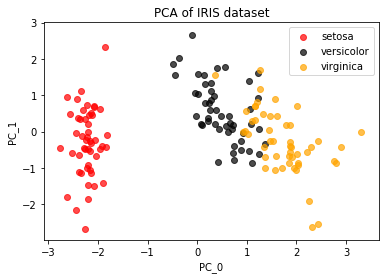

In [37]:
#可视化一下X_new
clors = ['red','black','orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_new[iris.target ==i,0],
                X_new[iris.target==i, 1],
                alpha=0.7,
                c=clors[i],
                label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.xlabel('PC_0')
plt.ylabel('PC_1')
plt.show()